<a href="https://colab.research.google.com/github/adityasaich/sasi_btp/blob/main/sasi_btp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id = '18xGNPuvbXGSN97g0CzI1tIBl81zJrToF'

In [10]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dataset.csv')  
df_input = pd.read_csv('dataset.csv')
#df_input = df_input.sample(n=50000)

In [16]:
df = df_input
(df.groupby(['Crop']).mean()).sort_values(by=['ProductionPerArea'],ascending=False)

,Crop_Year,ProductionPerArea
Crop,,
Sugarcane,2005.432666,45.797370
Banana,2005.738467,26.793224
Cabbage,2009.000000,25.069837
Grapes,2003.777778,22.964461
Papaya,2006.539359,19.950994
...,...,...
Moong(Green Gram),2007.097731,0.730095
other misc. pulses,2002.250000,0.715880
Turnip,2002.500000,0.706892


In [ ]:
#url = 'https://raw.githubusercontent.com/adityasaich/sasi_btp/main/dataworld_set.csv?token=ALPKPQCX3COGEIP65QDO2V3BR5QT6'
#df_input = pd.read_csv(url)

In [ ]:
def deviationTransform(arr):
  m = np.mean(arr)
  d = np.std(arr)
  return [0,d]
def minMaxTransform(arr):
  min = np.min(arr)
  max = np.max(arr)
  return [min,max-min]

In [11]:
#pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
df_input = df_input[df_input['Area'] > 0 ]
df_input = df_input[df_input['Production'] > 0 ]
df_input["ProductionPerArea"] = ((df_input["Production"])/(df_input["Area"]))
#dropping columns which are not used
df_input = df_input.drop(columns=['State_Name','Area','Production'])
#replace empty strings with nan
df_input = df_input.replace(r'^\s*$', np.NaN, regex=True)
#drop null values
df_input = df_input.dropna()
p1 = np.percentile(np.array(df_input['ProductionPerArea']),25)
p2 = np.percentile(np.array(df_input['ProductionPerArea']),99)
df_input = df_input[df_input['ProductionPerArea'] > p1]
df_input = df_input[df_input['ProductionPerArea'] < p2]


In [ ]:
set(df_input['District_Name'])

{'24 PARAGANAS NORTH',
 '24 PARAGANAS SOUTH',
 'ADILABAD',
 'AGAR MALWA',
 'AGRA',
 'AHMADABAD',
 'AHMEDNAGAR',
 'AIZAWL',
 'AJMER',
 'AKOLA',
 'ALAPPUZHA',
 'ALIGARH',
 'ALIRAJPUR',
 'ALLAHABAD',
 'ALMORA',
 'ALWAR',
 'AMBALA',
 'AMBEDKAR NAGAR',
 'AMETHI',
 'AMRAVATI',
 'AMRELI',
 'AMRITSAR',
 'AMROHA',
 'ANAND',
 'ANANTAPUR',
 'ANANTNAG',
 'ANJAW',
 'ANUGUL',
 'ANUPPUR',
 'ARARIA',
 'ARIYALUR',
 'ARWAL',
 'ASHOKNAGAR',
 'AURAIYA',
 'AURANGABAD',
 'AZAMGARH',
 'BADGAM',
 'BAGALKOT',
 'BAGESHWAR',
 'BAGHPAT',
 'BAHRAICH',
 'BAKSA',
 'BALAGHAT',
 'BALANGIR',
 'BALESHWAR',
 'BALLIA',
 'BALOD',
 'BALODA BAZAR',
 'BALRAMPUR',
 'BANAS KANTHA',
 'BANDA',
 'BANDIPORA',
 'BANGALORE RURAL',
 'BANKA',
 'BANKURA',
 'BANSWARA',
 'BARABANKI',
 'BARAMULLA',
 'BARAN',
 'BARDHAMAN',
 'BAREILLY',
 'BARGARH',
 'BARMER',
 'BARNALA',
 'BARPETA',
 'BARWANI',
 'BASTAR',
 'BASTI',
 'BATHINDA',
 'BEED',
 'BEGUSARAI',
 'BELGAUM',
 'BELLARY',
 'BEMETARA',
 'BENGALURU URBAN',
 'BETUL',
 'BHADRAK',
 'BHAGALPUR',

count    238838.000000
mean         42.263407
std         823.564866
min           0.000003
25%           0.532242
50%           1.000000
75%           2.400000
max       88000.000000
Name: ProductionPerArea, dtype: float64


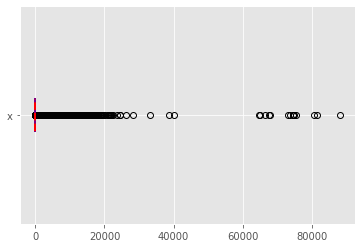

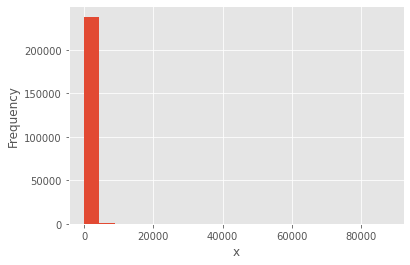

In [ ]:
x = df_input['ProductionPerArea']
print(x.describe())

import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.boxplot((x), vert=False, showmeans=True, meanline=True,
           labels=('x'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()
hist, bin_edges = np.histogram(x, bins=20)
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
categorical_columns = ['District_Name', 'Crop' ,'Season']
#label encoder dict
labels_dict = {}
#scaling dict
scaling_dict = {}
for column in categorical_columns:
  le = LabelEncoder()
  le.fit(df_input[column])
  df_input[column] = le.transform(df_input[column])
  labels_dict[column] = list(le.classes_)
  scaling_params = minMaxTransform(np.array(df_input[column]))
  df_input[column] = (df_input[column] - scaling_params[0])/scaling_params[1]
  scaling_dict[column] = scaling_params
scaling_params = deviationTransform(np.array(df_input['Crop_Year'])) 
scaling_dict['Crop_Year'] = scaling_params
df_input['Crop_Year'] = (df_input['Crop_Year'] - scaling_params[0])/scaling_params[1]
scaling_params = deviationTransform(np.array(df_input['ProductionPerArea']))
df_input['ProductionPerArea'] = (df_input['ProductionPerArea'] - scaling_params[0])/scaling_params[1]
scaling_dict['ProductionPerArea'] = scaling_params


In [ ]:
df_input

,District_Name,Crop_Year,Season,Crop,ProductionPerArea
0,0.662016,400.190358,0.2,0.009709,0.146941
2,0.662016,400.190358,0.2,0.766990,0.289946
3,0.662016,400.190358,0.8,0.048544,0.335550
6,0.662016,400.190358,0.8,0.310680,0.255923
7,0.662016,400.190358,0.8,0.864078,0.184265
...,...,...,...,...,...
246085,0.730233,402.991690,0.6,0.495146,0.578024
246086,0.730233,402.991690,0.6,0.766990,0.241170
246087,0.730233,402.991690,0.6,0.834951,0.068034
246088,0.730233,402.991690,0.8,0.864078,4.620831


In [ ]:
from sklearn.model_selection import train_test_split
df_small = df_input
df_small.columns.name = None
df=df_small
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.33, random_state=42)

In [ ]:
scaling_dict

{'Crop': [0, 103],
 'Crop_Year': [0, 4.997621662863402],
 'District_Name': [0, 645],
 'ProductionPerArea': [0, 10.853961241929442],
 'Season': [0, 5]}

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def classify(clf,x_train,x_test,y_train,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print(y_pred)
  y_train_pred = clf.predict(x_train)
  metricsList = []
  metricsList.append(mean_squared_error(y_train, y_train_pred))
  metricsList.append(mean_absolute_error(y_test, y_pred))
  metricsList.append(np.sqrt(mean_squared_error(y_test, y_pred)))
  metricsList.append(r2_score(y_test,y_pred))
  y_pred = np.array(y_pred)
  y_test = np.array(y_test)
  for i in range(y_test.size):
    if(y_test[i]>15):
      print(i,y_test[i],y_pred[i])
  data={}
  data['x'] = y_test
  data['y'] = y_pred
  #sns.regplot(x="x", y="y", data=data);
  return metricsList


In [ ]:
clfMetrics = []

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regresser = RandomForestRegressor(n_estimators = 10 ,random_state = 0)
print("\t\t\t random-forest classifier")
clfMetrics.append((classify(regresser,x_train,x_test,y_train,y_test)))
print(clfMetrics)

			 random-forest classifier
[0.12049461 0.23074693 0.06795801 ... 5.81889396 0.26006491 4.85382927]
[[0.02149404095614868, 0.1150178889552193, 0.33945632881557875, 0.8828136974195047]]


In [ ]:
regresser.get_params("true")

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
print("\t\t\t linear-regression classifier")
clfMetrics.append((classify(reg,x_train,x_test,y_train,y_test)))
print(clfMetrics)

			 linear-regression classifier
[0.00804721 0.01322361 0.00507802 ... 0.01250506 0.01038391 0.01274328]
[[3.7124307254060725e-06, 0.0015127300089711254, 0.004453244017675656, 0.8838874164467735], [0.00015706748090237865, 0.006590277513631465, 0.012385990235560354, 0.10176956008491334]]


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
K = 3
model = neighbors.KNeighborsRegressor(n_neighbors = K)
clfMetrics.append((classify(model,x_train,x_test,y_train,y_test)))
print(clfMetrics)

[0.12590033 1.27130037 0.06907657 ... 5.59039294 0.2764514  4.85034619]
[[0.02149404095614868, 0.1150178889552193, 0.33945632881557875, 0.8828136974195047], [0.22619747872918902, 0.28456769510767926, 0.6957609228603792, 0.5077008364427107]]


In [ ]:
json_params = {}
json_params['labels'] = labels_dict
json_params['scaling'] = scaling_dict

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

        MSE       MAE      RMSE  R2_Score             models
0  0.000004  0.001513  0.004453  0.883887      Random Forest
1  0.000157  0.006590  0.012386  0.101770  Linear Regression
2  0.000039  0.003748  0.009145  0.510310      KNN regressor


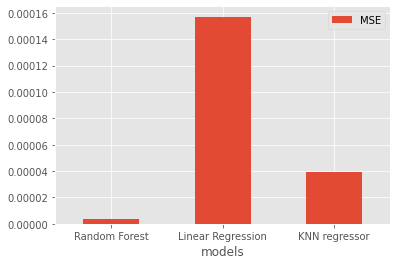

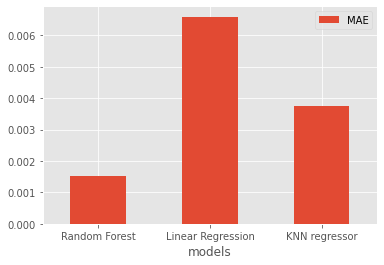

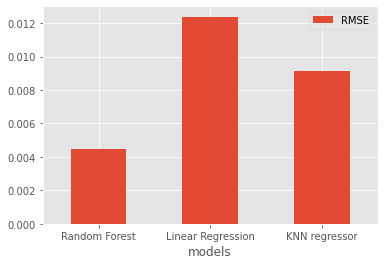

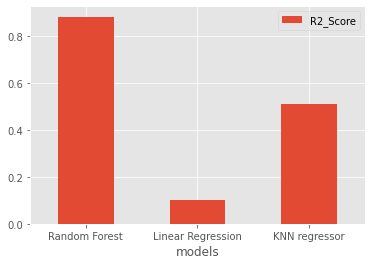

In [ ]:
df = pd.DataFrame.from_records(clfMetrics)
metricList = ['MSE','MAE','RMSE','R2_Score']
df.columns= metricList
df['models'] = ['Random Forest','Linear Regression' ,'KNN regressor']
print(df)
for metric in metricList:
  df.plot.bar(x='models', y=metric, rot=0)

In [ ]:
pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

,lab,val
0,A,10
1,B,30
2,C,20
